In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
# TA CODE
def load_data(data_path):

    FEATURES = range(2, 33)
    N_TIME_SERIES = 3500

    # Create the training and testing samples
    LS_path = os.path.join(data_path, 'LS')
    TS_path = os.path.join(data_path, 'TS')
    X_train, X_test = [np.zeros((N_TIME_SERIES, (len(FEATURES) * 512))) for i in range(2)]

    for f in FEATURES:
        data = np.loadtxt(os.path.join(LS_path, 'LS_sensor_{}.txt'.format(f)))
        X_train[:, (f-2)*512:(f-2+1)*512] = data
        data = np.loadtxt(os.path.join(TS_path, 'TS_sensor_{}.txt'.format(f)))
        X_test[:, (f-2)*512:(f-2+1)*512] = data
    
    y_train = np.loadtxt(os.path.join(LS_path, 'activity_Id.txt'))

    print('X_train size: {}.'.format(X_train.shape))
    print('y_train size: {}.'.format(y_train.shape))
    print('X_test size: {}.'.format(X_test.shape))

    return X_train, y_train, X_test

In [3]:
# TA CODE
def write_submission(y, where, submission_name='toy_submission.csv'):

    os.makedirs(where, exist_ok=True)

    SUBMISSION_PATH = os.path.join(where, submission_name)
    if os.path.exists(SUBMISSION_PATH):
        os.remove(SUBMISSION_PATH)

    y = y.astype(int)
    outputs = np.unique(y)

    # Verify conditions on the predictions
    if np.max(outputs) > 14:
        raise ValueError('Class {} does not exist.'.format(np.max(outputs)))
    if np.min(outputs) < 1:
        raise ValueError('Class {} does not exist.'.format(np.min(outputs)))
    
    # Write submission file
    with open(SUBMISSION_PATH, 'a') as file:
        n_samples = len(y)
        if n_samples != 3500:
            raise ValueError('Check the number of predicted values.')

        file.write('Id,Prediction\n')

        for n, i in enumerate(y):
            file.write('{},{}\n'.format(n+1, int(i)))

    print('Submission {} saved in {}.'.format(submission_name, SUBMISSION_PATH))

In [4]:
# Directory containing the data folders
DATA_PATH = 'data'
X_train, y_train, X_test = load_data(DATA_PATH)

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


In [5]:
X_train

array([[ 1.2279000e+02,  1.2278000e+02,  1.2277000e+02, ...,
        -9.9999999e+05, -9.9999999e+05, -9.9999999e+05],
       [ 6.6000000e+01,  6.6000000e+01,  6.6000000e+01, ...,
        -2.3830000e+01, -2.3830000e+01, -2.3830000e+01],
       [ 1.0000000e+02,  1.0000000e+02,  1.0000000e+02, ...,
        -2.5390000e+01, -2.5340000e+01, -2.5390000e+01],
       ...,
       [ 1.2653000e+02,  1.2654000e+02,  1.2655000e+02, ...,
        -9.9999999e+05, -9.9999999e+05, -9.9999999e+05],
       [ 7.6800000e+01,  7.6810000e+01,  7.6820000e+01, ...,
        -3.7950000e+01, -3.7950000e+01, -3.7950000e+01],
       [ 9.5380000e+01,  9.5410000e+01,  9.5440000e+01, ...,
        -1.7150000e+01, -1.7150000e+01, -1.7150000e+01]])

In [6]:
y_train

array([ 6.,  1., 12., ...,  7., 11., 11.])

KNN with K=1

In [7]:
clfKNN1 = KNeighborsClassifier(n_neighbors=1)
scoresKNN1 = cross_val_score(clfKNN1, X_train, y_train, cv=10, scoring='accuracy')
print("Mean accuracy of 1-NN with 10-fold CV: {}".format(scoresKNN1.mean()))

Mean accuracy of 1-NN with 10-fold CV: 0.9248571428571429


KNN with K=25

In [8]:
clfKNN2 = KNeighborsClassifier(n_neighbors=25)
scoresKNN2 = cross_val_score(clfKNN2, X_train, y_train, cv=10, scoring='accuracy')
print("Mean accuracy of 25-NN with 10-fold CV: {}".format(scoresKNN2.mean()))

Mean accuracy of 25-NN with 10-fold CV: 0.7374285714285713


Plotting mean accuracies of KNN based on value of K (10-CV)

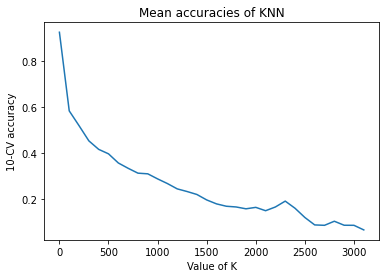

In [11]:
k_values = []
mean_accuracies = []
for i in range(1, 3102, 100):
    clf = KNeighborsClassifier(n_neighbors=i)
    k_values.append(i)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    mean_accuracies.append(scores.mean())
plt.plot(k_values, mean_accuracies)
plt.xlabel("Value of K")
plt.ylabel("10-CV accuracy")
plt.title("Mean accuracies of KNN")
plt.savefig('knn_basic_accuracies.png')
plt.show()

Plotting mean accuracies of KNN based on value of K (2-CV)

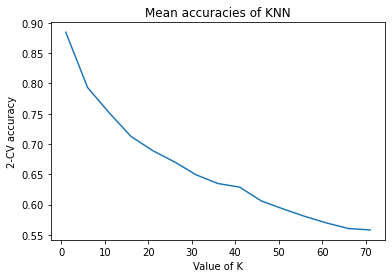

In [15]:
NB_FOLD = 2
k_values = []
mean_accuracies = []
for i in range(1, 75, 5):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, X_train, y_train, cv=NB_FOLD, scoring='accuracy', n_jobs=-1)
    mean_accuracies.append(scores.mean())
    k_values.append(i)
plt.plot(k_values, mean_accuracies)
plt.xlabel("Value of K")
plt.ylabel("2-CV accuracy")
plt.title("Mean accuracies of KNN")
plt.savefig('knn_basic_accuracies_2cv.png')
plt.show()

Plotting mean accuracies of KNN based on value of K (10-CV) using negative log loss

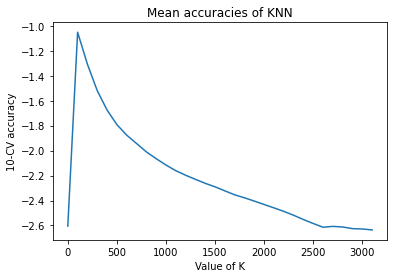

In [17]:
k_values = []
mean_accuracies = []
for i in range(1, 3102, 100):
    clf = KNeighborsClassifier(n_neighbors=i)
    k_values.append(i)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_log_loss', n_jobs=-1)
    mean_accuracies.append(scores.mean())
plt.plot(k_values, mean_accuracies)
plt.xlabel("Value of K")
plt.ylabel("10-CV accuracy")
plt.title("Mean accuracies of KNN")
plt.savefig('knn_basic_accuracies_log_loss.png')
plt.show()

Optimal value of n_neighbor = 49


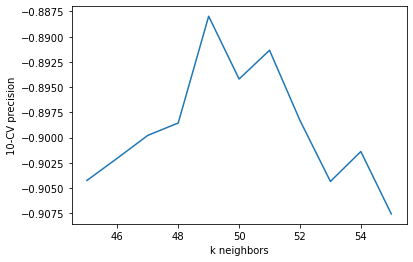

In [18]:
k_values = []
mean_accuracies = []
for i in range (45, 56, 1):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_log_loss', n_jobs=-1)
    mean_accuracies.append(scores.mean())
    k_values.append(i)
minLoss = max(mean_accuracies)
print("Optimal value of n_neighbor = {}".format(k_values[mean_accuracies.index(minLoss)]))
plt.plot(k_values, mean_accuracies)
plt.xlabel("k neighbors")
plt.ylabel("10-CV precision")
plt.savefig('knn_basic_accuracies_log_loss_precise.png')
plt.show()

In [24]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.7, random_state=0)

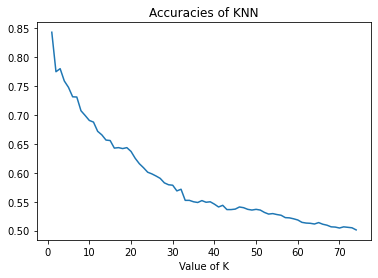

In [25]:
k_values = []
accuracies = []
for i in range(1, 75, 1):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train_split, y_train_split)
    score = clf.score(X_test_split, y_test_split)
    accuracies.append(score)
    k_values.append(i)
plt.plot(k_values, accuracies)
plt.xlabel("Value of K")
plt.title("Accuracies of KNN")
plt.savefig('knn_basic_70percent_test.png')
plt.show()

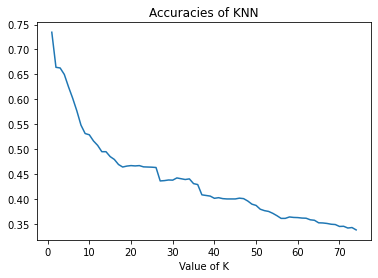

In [26]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.9, random_state=0)
k_values = []
accuracies = []
for i in range(1, 75, 1):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train_split, y_train_split)
    score = clf.score(X_test_split, y_test_split)
    accuracies.append(score)
    k_values.append(i)
plt.plot(k_values, accuracies)
plt.xlabel("Value of K")
plt.title("Accuracies of KNN")
plt.savefig('knn_basic_90percent_test.png')
plt.show()